# Predicting the future of Women in STEM


## Project Focus

**Main Goal:** The focus for this project is write an algorithm that recognizes names of authors based on gender, studies how the gender distribution has evolved with time, and predicts how many women in STEM there will be in 2020. 

## Dataset Used

We will use data from kaggle "arixiv data", which included the following meta data from papers published bewteen 1992 and 2018
- author name:
- month of publication
- summary of the papers
- title of the paper


## By Franklin and Meryem

# Load the libraries

In [1]:
# libries being use are 

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics


plt.style.use("ggplot")

%matplotlib inline

# Load the arixiv data

In [2]:
import json
with open('arxivData.json') as data_file: # 
    data = json.load(data_file)    
    
#import pandas as pd
df = pd.DataFrame.from_dict(data, orient='columns') # load json data as pandas dataframe

df.head(3)

,author,day,id,link,month,summary,tag,title,year
0,"[{'name': 'Ahmed Osman'}, {'name': 'Wojciech S...",1,1802.00209v1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",2,We propose an architecture for VQA which utili...,"[{'term': 'cs.AI', 'scheme': 'http://arxiv.org...",Dual Recurrent Attention Units for Visual Ques...,2018
1,"[{'name': 'Ji Young Lee'}, {'name': 'Franck De...",12,1603.03827v1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",3,Recent approaches based on artificial neural n...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",Sequential Short-Text Classification with Recu...,2016
2,"[{'name': 'Iulian Vlad Serban'}, {'name': 'Tim...",2,1606.00776v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",6,We introduce the multiresolution recurrent neu...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",Multiresolution Recurrent Neural Networks: An ...,2016


# Drop unused features(columns) 

In [3]:
df.drop('day', axis= 1, inplace= True)

df.drop('id', axis= 1, inplace= True)

df.drop('link', axis= 1, inplace= True)

df.drop('tag', axis= 1, inplace= True)

In [4]:
df.head()

,author,month,summary,title,year
0,"[{'name': 'Ahmed Osman'}, {'name': 'Wojciech S...",2,We propose an architecture for VQA which utili...,Dual Recurrent Attention Units for Visual Ques...,2018
1,"[{'name': 'Ji Young Lee'}, {'name': 'Franck De...",3,Recent approaches based on artificial neural n...,Sequential Short-Text Classification with Recu...,2016
2,"[{'name': 'Iulian Vlad Serban'}, {'name': 'Tim...",6,We introduce the multiresolution recurrent neu...,Multiresolution Recurrent Neural Networks: An ...,2016
3,"[{'name': 'Sebastian Ruder'}, {'name': 'Joachi...",5,Multi-task learning is motivated by the observ...,Learning what to share between loosely related...,2017
4,"[{'name': 'Iulian V. Serban'}, {'name': 'Chinn...",9,We present MILABOT: a deep reinforcement learn...,A Deep Reinforcement Learning Chatbot,2017


# Data Cleaning

- We have to clean the author data

# View the author feature 

In [5]:
df['author'].head()

0    [{'name': 'Ahmed Osman'}, {'name': 'Wojciech S...
1    [{'name': 'Ji Young Lee'}, {'name': 'Franck De...
2    [{'name': 'Iulian Vlad Serban'}, {'name': 'Tim...
3    [{'name': 'Sebastian Ruder'}, {'name': 'Joachi...
4    [{'name': 'Iulian V. Serban'}, {'name': 'Chinn...
Name: author, dtype: object

# Get the first name

In [6]:
name = df['author']

test = name.str.split(" ", n = 1, expand = True) # split the 'name' from the data 

test2 = test[1].str.split(" ", n = 1, expand = True) # split the 'first' from the data

a = test2[0] # assign first name data to a 

a = a.str.replace("'", "") # remove " ' " from the first data  

a.head()

0        Ahmed
1           Ji
2       Iulian
3    Sebastian
4       Iulian
Name: 0, dtype: object

# Get the Last name

In [7]:
test2.head(2)

,0,1
0,'Ahmed,"Osman'}, {'name': 'Wojciech Samek'}]"
1,'Ji,"Young Lee'}, {'name': 'Franck Dernoncourt'}]"


In [8]:
test3 = test2[1].str.split(" ", n = 1, expand = True) # split the ' 1 ' from the data 

test3.head(3)

,0,1
0,"Osman'},",{'name': 'Wojciech Samek'}]
1,Young,"Lee'}, {'name': 'Franck Dernoncourt'}]"
2,Vlad,"Serban'}, {'name': 'Tim Klinger'}, {'name': 'G..."


In [9]:
b = test3[0] 

b = b.str.replace(".", "") # remove the '.'

b = b.str.replace("'", "") # remove the " ' "

b = b.str.replace(",", "") #  remove the ","

b = b.str.replace("}", "") # remove the " } "

b.head()

0    Osman
1    Young
2     Vlad
3    Ruder
4        V
Name: 0, dtype: object

# Join the Cleaned first and last data to the original data

In [10]:
df_2 = pd.concat([df,a,b], axis= 1)

df_2.head()

,author,month,summary,title,year,0,0
0,"[{'name': 'Ahmed Osman'}, {'name': 'Wojciech S...",2,We propose an architecture for VQA which utili...,Dual Recurrent Attention Units for Visual Ques...,2018,Ahmed,Osman
1,"[{'name': 'Ji Young Lee'}, {'name': 'Franck De...",3,Recent approaches based on artificial neural n...,Sequential Short-Text Classification with Recu...,2016,Ji,Young
2,"[{'name': 'Iulian Vlad Serban'}, {'name': 'Tim...",6,We introduce the multiresolution recurrent neu...,Multiresolution Recurrent Neural Networks: An ...,2016,Iulian,Vlad
3,"[{'name': 'Sebastian Ruder'}, {'name': 'Joachi...",5,Multi-task learning is motivated by the observ...,Learning what to share between loosely related...,2017,Sebastian,Ruder
4,"[{'name': 'Iulian V. Serban'}, {'name': 'Chinn...",9,We present MILABOT: a deep reinforcement learn...,A Deep Reinforcement Learning Chatbot,2017,Iulian,V


# Remove the uncleaned author data and month features from the data

In [11]:
df_2.drop('author', axis= 1, inplace= True)

df_2.drop('month', axis= 1, inplace= True)

df_2.head()

,summary,title,year,0,0
0,We propose an architecture for VQA which utili...,Dual Recurrent Attention Units for Visual Ques...,2018,Ahmed,Osman
1,Recent approaches based on artificial neural n...,Sequential Short-Text Classification with Recu...,2016,Ji,Young
2,We introduce the multiresolution recurrent neu...,Multiresolution Recurrent Neural Networks: An ...,2016,Iulian,Vlad
3,Multi-task learning is motivated by the observ...,Learning what to share between loosely related...,2017,Sebastian,Ruder
4,We present MILABOT: a deep reinforcement learn...,A Deep Reinforcement Learning Chatbot,2017,Iulian,V


# Rename the columns 

In [12]:
df_2.columns = ['Summary','Title','Year','name', 'Last']

df_2.head()

,Summary,Title,Year,name,Last
0,We propose an architecture for VQA which utili...,Dual Recurrent Attention Units for Visual Ques...,2018,Ahmed,Osman
1,Recent approaches based on artificial neural n...,Sequential Short-Text Classification with Recu...,2016,Ji,Young
2,We introduce the multiresolution recurrent neu...,Multiresolution Recurrent Neural Networks: An ...,2016,Iulian,Vlad
3,Multi-task learning is motivated by the observ...,Learning what to share between loosely related...,2017,Sebastian,Ruder
4,We present MILABOT: a deep reinforcement learn...,A Deep Reinforcement Learning Chatbot,2017,Iulian,V


# Get authors' gender based on their names


**Use world data name to match with the authors' name**

In [13]:
name_search = pd.read_csv("name_gender.csv")

name_search.drop('probability', axis=1, inplace= True)

name_search.head(5)

,name,gender
0,Aaban,M
1,Aabha,F
2,Aabid,M
3,Aabriella,F
4,Aada,F


In [14]:
name_search.shape

(95026, 2)

# Merge the 'World data name' with 'author first name' to get their gender

In [15]:
data = pd.merge(df_2,name_search, on = 'name')

data.head()

,Summary,Title,Year,name,Last,gender
0,We propose an architecture for VQA which utili...,Dual Recurrent Attention Units for Visual Ques...,2018,Ahmed,Osman,M
1,In this work we present a state-of-the-art app...,Sequence to sequence learning for unconstraine...,2016,Ahmed,Mamdouh,M
2,For robots to coexist with humans in a social ...,Robot gains Social Intelligence through Multim...,2017,Ahmed,Hussain,M
3,"For a safe, natural and effective human-robot ...","Show, Attend and Interact: Perceivable Human-R...",2017,Ahmed,Hussain,M
4,We introduce Recurrent Predictive State Policy...,Recurrent Predictive State Policy Networks,2018,Ahmed,Hefny,M


# Change the Gender data to M -> 0 and F -> 1

In [16]:
data.columns = ['Summary','Title','Year','First Name', 'Last Name', 'Gender']

data['Gender']=data['Gender'].map({'M':0,'F':1})

data.head()

,Summary,Title,Year,First Name,Last Name,Gender
0,We propose an architecture for VQA which utili...,Dual Recurrent Attention Units for Visual Ques...,2018,Ahmed,Osman,0
1,In this work we present a state-of-the-art app...,Sequence to sequence learning for unconstraine...,2016,Ahmed,Mamdouh,0
2,For robots to coexist with humans in a social ...,Robot gains Social Intelligence through Multim...,2017,Ahmed,Hussain,0
3,"For a safe, natural and effective human-robot ...","Show, Attend and Interact: Perceivable Human-R...",2017,Ahmed,Hussain,0
4,We introduce Recurrent Predictive State Policy...,Recurrent Predictive State Policy Networks,2018,Ahmed,Hefny,0


**Save the new data to csv**

In [17]:
#data.to_csv("New_data.csv", index=False)

# Load the New data

In [18]:
df_3 = pd.read_csv("New_data.csv")

df_3.head()

,Summary,Title,Year,First Name,Last Name,Gender
0,We propose an architecture for VQA which utili...,Dual Recurrent Attention Units for Visual Ques...,2018,Ahmed,Osman,0
1,In this work we present a state-of-the-art app...,Sequence to sequence learning for unconstraine...,2016,Ahmed,Mamdouh,0
2,For robots to coexist with humans in a social ...,Robot gains Social Intelligence through Multim...,2017,Ahmed,Hussain,0
3,"For a safe, natural and effective human-robot ...","Show, Attend and Interact: Perceivable Human-R...",2017,Ahmed,Hussain,0
4,We introduce Recurrent Predictive State Policy...,Recurrent Predictive State Policy Networks,2018,Ahmed,Hefny,0


# Plot the histogram for the Year 

Text(0.5,1,'Hist of Year')

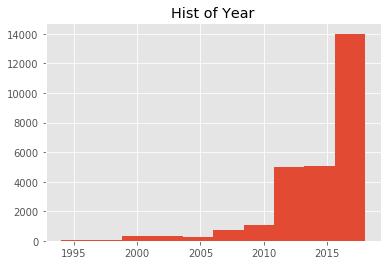

In [19]:
plt.hist(df_3['Year'])
plt.title("Hist of Year")

# Plot the histogram for the Gender

Text(0.5,0,'Male                                                                Female')

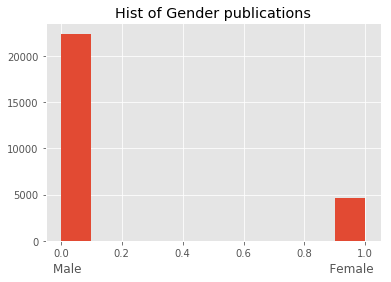

In [57]:
plt.hist(df_3['Gender'])
plt.title("Hist of Gender publications")
plt.xlabel("Male                                                                Female")

In [21]:
np.sum(df_3['Gender'] >0), np.sum(df_3['Gender']==0)

(4576, 22394)

# Group the data by the year

In [22]:
df_4=df_3.groupby(['Year'],as_index=False).count()

df_4.head()

,Year,Summary,Title,First Name,Last Name,Gender
0,1994,86,86,86,86,86
1,1995,1,1,1,1,1
2,1997,1,1,1,1,1
3,1998,44,44,44,44,44
4,1999,60,60,60,60,60


# Plot the Post vs. Year

Text(0,0.5,'Posts')

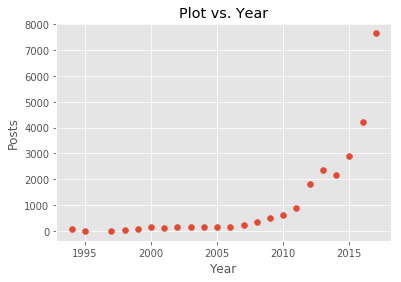

In [58]:
plt.scatter(df_4["Year"],df_4["Summary"])
plt.title("Plot vs. Year")
plt.xlabel("Year")
plt.ylabel("Posts")

# Remove the year 2018 data

Text(0,0.5,'Posts')

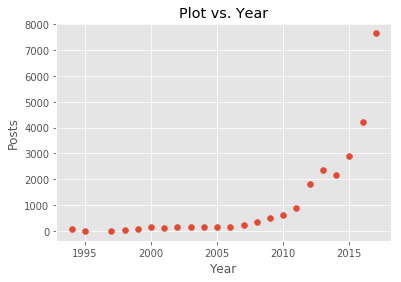

In [59]:
df_4 = df_4[df_4.Year != 2018]
plt.scatter(df_4["Year"],df_4["Summary"])
plt.title("Plot vs. Year")
plt.xlabel("Year")
plt.ylabel("Posts")


# Grab the male data from the original dataset 

Text(0,0.5,'Posts')

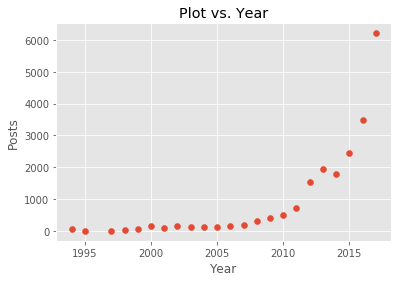

In [60]:
is_male = df_3["Gender"]==0

df_3_male=df_3[is_male]

df_male = df_3_male.groupby(['Year'],as_index=False).count()

df_male = df_male[df_male.Year != 2018]

plt.scatter(df_male["Year"],df_male["Summary"])
plt.title("Plot vs. Year")
plt.xlabel("Year")
plt.ylabel("Posts")

# Grab the female data from the original dataset

Text(0,0.5,'Posts')

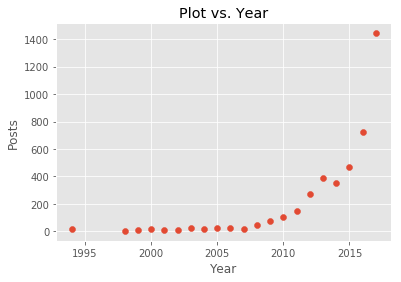

In [61]:
is_female = df_3["Gender"] == 1

df_2_female = df_3[is_female]

df_female=df_2_female.groupby(['Year'],as_index=False).count()

df_female = df_female[df_female.Year != 2018]

plt.scatter(df_female["Year"],df_female["Summary"])
plt.title("Plot vs. Year")
plt.xlabel("Year")
plt.ylabel("Posts")

# Plot both male and female to see the number per year

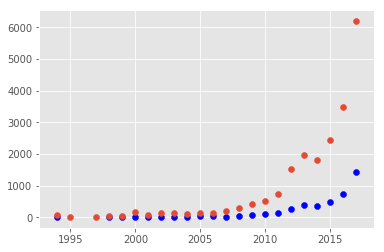

In [27]:
import pylab as plt
plt.scatter(df_female["Year"],df_female["Summary"], color = "blue")
plt.scatter(df_male["Year"],df_male["Summary"])
plt.show()

 # Build the Linear model for female data

In [28]:

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression

model = LinearRegression()

x = np.asarray(df_female["Year"])

x = x.reshape(-1,1)

y = df_female["Summary"]

model.fit(x,df_female["Summary"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
model.coef_, model.intercept_

(array([37.85195911]), -75763.28404315728)

# Build the linear regression

Text(0.5,1,'Posts = 37.85 * Year -75763.28')

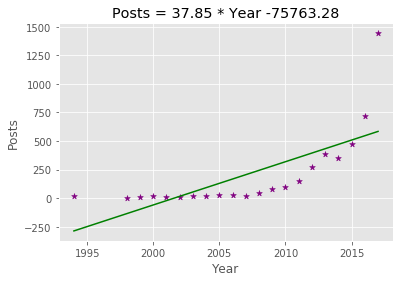

In [30]:
plt.scatter(x,y,marker='*',color = 'purple');

plt.plot(x, model.coef_*x + model.intercept_, color = 'green')

plt.xlabel('Year')

plt.ylabel('Posts')

plt.title('Posts = 37.85 * Year -75763.28')

In [31]:
# r2 for the linear regression
ypred = cross_val_predict(model,x,y,cv=5)
metrics.r2_score(y, ypred)

-0.387388836395439

# Polynomial Regression

In [32]:
from sklearn.preprocessing import PolynomialFeatures

poly= PolynomialFeatures(degree=2)

x_poly = poly.fit_transform(x)

poly.fit(x_poly,y)

Model2=LinearRegression()

Model2.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0.5,1,'Female')

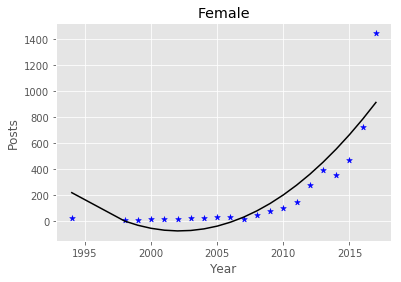

In [33]:
plt.scatter(x,y,marker='*',color = 'b');

plt.plot(x, Model2.predict(poly.fit_transform(x)), color = 'k')

plt.xlabel('Year')

plt.ylabel('Posts')

plt.title('Female')

In [34]:
# r2 for the polynomial regression
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(x.reshape(-1, 1))

y_pred = Model2.predict(X_poly)

print(metrics.r2_score(y, y_pred))

0.7940098657662628


# The prediction of women in STEM in 2020

In [35]:
Model2.predict(poly.fit_transform(2020)) 


array([1349.39918682])

# There might be about 1349 women pubilcations in STEM 

 # Build the Polynomial model for Male data

Text(0.5,1,'male')

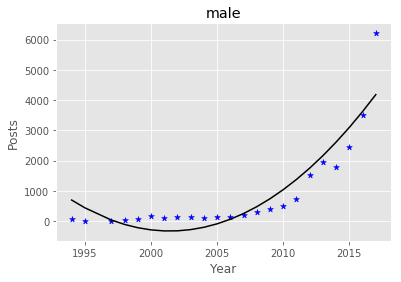

In [47]:
x = np.asarray(df_male["Year"])
x = x.reshape(-1,1)
y = df_male["Summary"]

model.fit(x,df_male["Summary"])
poly= PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

poly.fit(x_poly,y)
Model3=LinearRegression()
Model3.fit(x_poly,y)

plt.scatter(x,y,marker='*',color = 'b');
plt.plot(x, Model3.predict(poly.fit_transform(x)), color = 'k')
plt.xlabel('Year')
plt.ylabel('Posts')
plt.title('male')

In [45]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(x.reshape(-1, 1))

y_pred = Model2.predict(X_poly)

print(metrics.r2_score(y, y_pred))

0.8417213908863067


In [46]:
Model3.predict(poly.fit_transform(2020)) 

array([6082.49722272])

# reference:
    
- https://stackoverflow.com/questions/39040250/how-to-read-json-file-with-pandas

- https://stackoverflow.com/questions/41168558/python-how-to-convert-json-file-to-dataframe

- https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/

- https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/

- https://stackoverflow.com/questions/31290976/sklearn-how-to-get-coefficients-of-polynomial-features

- https://medium.com/kharpann/performing-polynomial-regression-using-python-840eb666bfd8

# Thank you

# to Show the slide

jupyter nbconvert Desktop/Presentration/Jupyter_Slides.ipynb --to slides --post serve
